In [1]:
# File: StudentMentalHealthVis.ipynb

# Name: Hannah Sepnio

# Date Created: Feb 6, 2024

# Date Last Modified: Feb 26, 2024

# Link to Dataset: https://www.kaggle.com/datasets/shariful07/student-mental-health

#### Import Libraries

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataframe
df = pd.read_csv('Student_Mental_health.csv')

In [4]:
# Rename columns
df.rename(columns={'What is your course?': 'Major', 'Your current year of Study': 'Current Year', 'Do you have Depression?':'Depression', 'Do you have Panic attack?': 'Panic attack', 'Do you have Anxiety?': 'Anxiety'}, inplace=True)

In [5]:
# Check head
df.head()

,Timestamp,Choose your gender,Age,Major,Current Year,What is your CGPA?,Marital status,Depression,Anxiety,Panic attack,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### Create CGPA Distributions

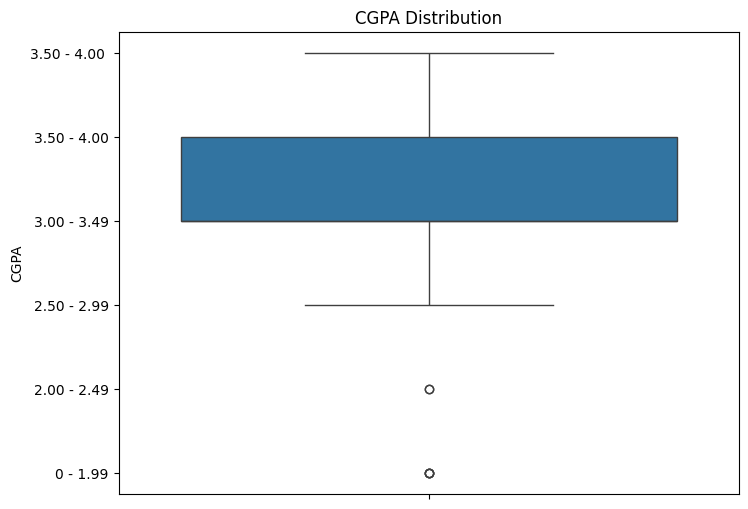

In [6]:
# Sort the DataFrame by CGPA
df_sorted = df.sort_values(by='What is your CGPA?', ascending=False)

# Boxplot for sorted CGPA distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_sorted, y='What is your CGPA?')
plt.title('CGPA Distribution')
plt.ylabel('CGPA')
plt.show()

### Distribution of Mental Health in Malaysia School

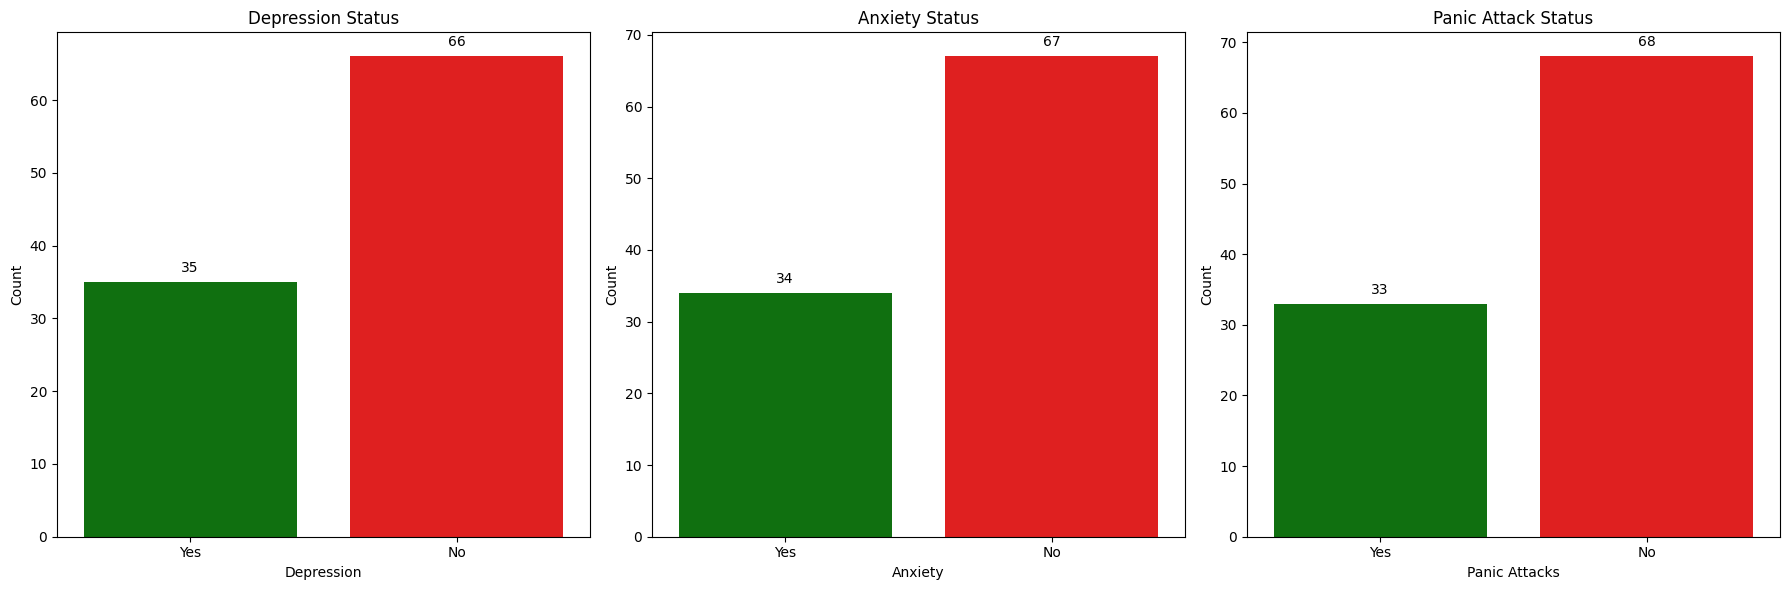

In [7]:
# Set custom colors for 'Yes' and 'No'
colors = {'Yes': 'green', 'No': 'red'}

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Countplot for depression status
sns.countplot(data=df, x='Depression', palette=colors, ax=axes[0], order=['Yes', 'No'])
axes[0].set_title('Depression Status')
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

# Countplot for anxiety status
sns.countplot(data=df, x='Anxiety', palette=colors, ax=axes[1], order=['Yes', 'No'])
axes[1].set_title('Anxiety Status')
axes[1].set_xlabel('Anxiety')
axes[1].set_ylabel('Count')
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

# Countplot for panic attack status
sns.countplot(data=df, x='Panic attack', palette=colors, ax=axes[2], order=['Yes', 'No'])
axes[2].set_title('Panic Attack Status')
axes[2].set_xlabel('Panic Attacks')
axes[2].set_ylabel('Count')
for p in axes[2].patches:
    axes[2].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

plt.tight_layout()
plt.savefig('studentmentalhealthmalaysia.png')
plt.show()

### Distribution of Specialist Help

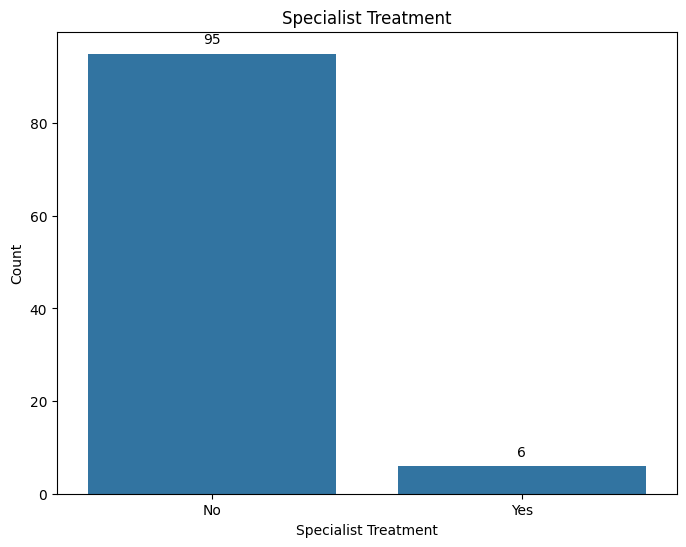

In [8]:
# Countplot for specialist treatment
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Did you seek any specialist for a treatment?')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Specialist Treatment')
plt.xlabel('Specialist Treatment')
plt.ylabel('Count')
plt.show()

### Multiple Disorders Visualizations

In [9]:
df_sorted['Multiple Disorders'] = 'No'

# Update the values based on conditions
for index, row in df.iterrows():
    if row['Depression'] == 'Yes' or row['Anxiety'] == 'Yes' or row['Panic attack'] == 'Yes':
        df_sorted.at[index, 'Multiple Disorders'] = 'Yes'

# Display the DataFrame to verify the changes
df_sorted.head()

,Timestamp,Choose your gender,Age,Major,Current Year,What is your CGPA?,Marital status,Depression,Anxiety,Panic attack,Did you seek any specialist for a treatment?,Multiple Disorders
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No,Yes
32,8/7/2020 14:29,Male,19.0,BCS,year 1,3.50 - 4.00,No,No,No,Yes,No,Yes
46,8/7/2020 15:12,Female,19.0,Engineering,year 1,3.50 - 4.00,No,No,Yes,No,No,Yes
85,13/07/2020 10:33:47,Female,18.0,psychology,year 1,3.50 - 4.00,No,Yes,Yes,No,Yes,Yes
65,8/7/2020 17:50,Female,23.0,Econs,year 1,3.50 - 4.00,No,Yes,Yes,No,No,Yes


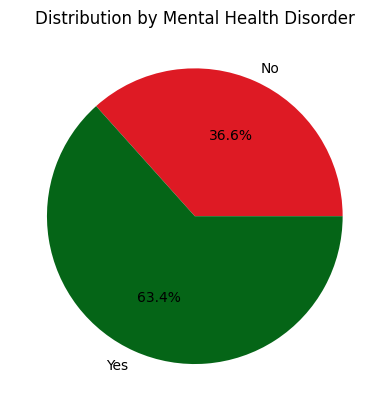

In [10]:
# Group by 'Multiple Disorders' and count occurrences
stu_overall_counts = df_sorted.groupby('Multiple Disorders').size().reset_index(name='Count')

# Plotting
#plt.figure(figsize=(8, 8))
plt.pie(stu_overall_counts['Count'], labels=stu_overall_counts['Multiple Disorders'], autopct='%1.1f%%', colors=['#de1a24', '#056517'])
plt.title("Distribution by Mental Health Disorder")
# Calculate the sum of 'Mental Health' occurrences
plt.savefig('studentmentalhealthmalaysiatotal.png')


### cGPA vs Mental health disorder

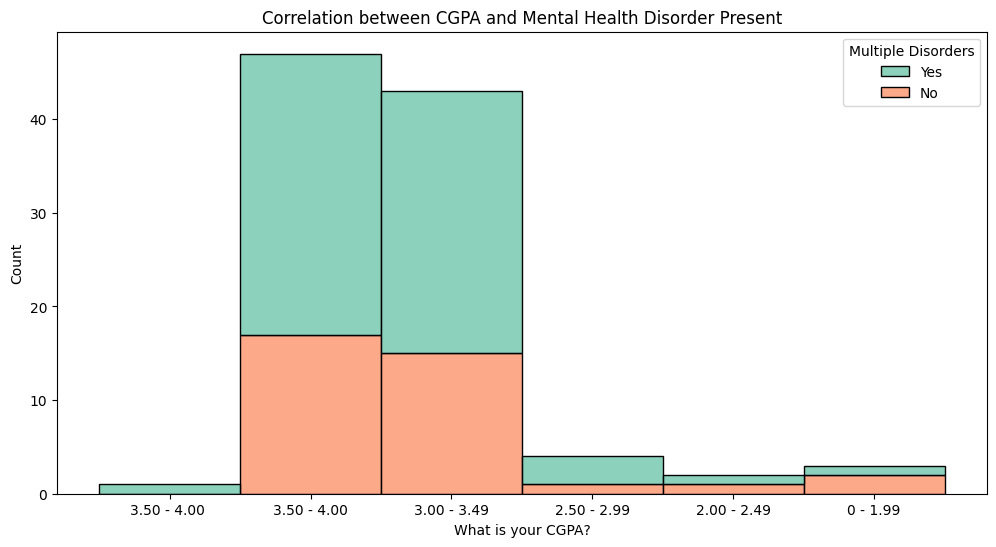

In [26]:
df_sorted['What is your CGPA?'] = df_sorted['What is your CGPA?'].astype(str)

cgpa_values = sorted(df_sorted['What is your CGPA?'].unique())
plt.figure(figsize=(12, 6))


# Plot
sns.histplot(data=df_sorted, x='What is your CGPA?', hue='Multiple Disorders', palette='Set2', multiple='stack', discrete=True)
plt.title('Correlation between CGPA and Mental Health Disorder Present')
plt.savefig('studentmentalhealthmalaysiatotalCGPA.png')
